## Decision Tree
En este notebook podremos ejecutar el trabajo necesario para desarrollar un modelo de predicción basado en árboles de decisión simples. Con este modelo buscamos tener una capacidad de predicción alta, al mismo tiempo que obtener una interpretabilidad de los resultados bastante alta también. La variable label que vamos a utilizar en este modelo es el de unidades vendidas.

IMPORTANTE: Este modelo no es nuestro modelo final y no pretende ser el final de la consultoría. Este desarrollo nos permite tener una mejor intención sobre los datos y obtener resultados mucho más precisos en el modelo final futuro.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [101]:
df = pd.read_csv('BdD_Estructurada_1.csv')
data = pd.DataFrame(df)
new_data = data.drop(columns=['enviados_totales','cobrados_totales','titulo', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])
new_data['fecha'] = pd.to_datetime(new_data['fecha'], errors='coerce')

new_data['dia'] = new_data['dia'].astype('category')
numeric_cols = new_data.select_dtypes(include=['float64'])
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numeric_cols).astype('int64')
new_data[numeric_cols.columns] = imputed_data
new_data = new_data.dropna(subset=['fecha'])
print(f"Number of rows in DataFrame: {len(new_data)}")
print(f"Number of non-missing 'fecha' entries: {new_data['fecha'].notna().sum()}")
print(new_data.info())

Number of rows in DataFrame: 1090
Number of non-missing 'fecha' entries: 1090
<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1089
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  1090 non-null   datetime64[ns]
 1   dia                    1090 non-null   category      
 2   vendidos_totales       1090 non-null   int64         
 3   devueltos_totales      1090 non-null   int64         
 4   suscripciones_totales  1090 non-null   int64         
 5   tiendas_conveniencia   1090 non-null   int64         
 6   tiendas_barrio         1090 non-null   int64         
 7   sectoristas            1090 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(6)
memory usage: 69.5 KB
None


/tmp/ipykernel_2518/1505034422.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['fecha'] = pd.to_datetime(new_data['fecha'], errors='coerce')


In [102]:
new_data['year'] = new_data['fecha'].dt.year
new_data['month'] = new_data['fecha'].dt.month
new_data['day'] = new_data['fecha'].dt.day
new_data['day_of_week'] = new_data['fecha'].dt.dayofweek

new_data = new_data.drop(columns=['fecha'])

encoder = OneHotEncoder()
categorical_cols = new_data.select_dtypes(include=['category']).columns
encoded_features = encoder.fit_transform(new_data[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

new_data = pd.concat([new_data.drop(columns=categorical_cols), encoded_df], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    new_data.drop(columns=['vendidos_totales']),
    new_data['vendidos_totales'],
    test_size=0.3,
    random_state=42
)

clf = DecisionTreeRegressor(min_samples_leaf=20)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

n = len(y_test)
k = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - k - 1)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Adjusted R2 Score:", adjusted_r2)

Mean Squared Error: 81940984.23500483
R2 Score: 0.6005139767427985
Adjusted R2 Score: 0.5798953432843623


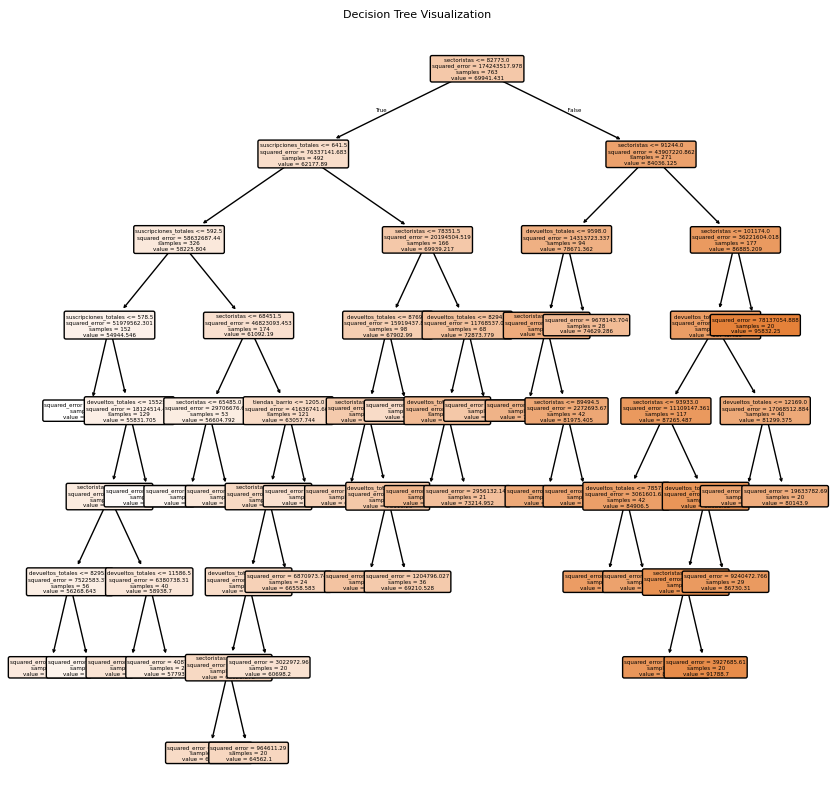

In [103]:
plt.figure(figsize=(10, 10))  
plot_tree(
    clf,
    feature_names=x_train.columns,  
    filled=True, 
    rounded=True,  
    fontsize=4  
)
plt.title("Decision Tree Visualization", fontsize=8)
plt.show()

In [104]:
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las variables:")
print(feature_importances)


Importancia de las variables:
                  Feature  Importance
4             sectoristas    0.800313
1   suscripciones_totales    0.160673
0       devueltos_totales    0.037433
3          tiendas_barrio    0.001581
2    tiendas_conveniencia    0.000000
5                    year    0.000000
6                   month    0.000000
7                     day    0.000000
8             day_of_week    0.000000
9              dia_Friday    0.000000
10             dia_Monday    0.000000
11           dia_Saturday    0.000000
12             dia_Sunday    0.000000
13           dia_Thursday    0.000000
14            dia_Tuesday    0.000000
15          dia_Wednesday    0.000000
